In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from scipy.stats import chi2, norm, cauchy
from iminuit import Minuit
from iminuit.cost import LeastSquares
# Cambiare directory per spostarsi nella cartella principale
import os
while not os.getcwd().endswith('Laboratorio_SiPM'):
    os.chdir('..')

#importo libreria
import sys
sys.path.append('Config')
from lablib import LS_fit


c:\Users\matte\OneDrive\Desktop\Università\Terzo Anno\Laboratorio di Nucleare e Subnucleare\Labo Programmazione\Laboratorio_SiPM\Config\lablib.py:157: SyntaxWarning: invalid escape sequence '\s'
  return pd.read_csv(path, sep='\s+', skiprows = skiprs, header=None, encoding= 'ISO-8859-1', names= titles) # type: ignore


In [2]:
#definisco le varie funzioni
def gauss(x, mu, sigma, a):
    return a * np.exp(-0.5 * ((x - mu) / sigma) ** 2)

def gauss_cost(x, mu, sigma, a, cost):
    return gauss(x, mu, sigma, a) + cost

def gauss_pol2(x, mu, sigma, a, b, c, cost):
    return gauss(x, mu, sigma, a) + b*x + c * x**2 + cost

def gauss_exp(x, mu, sigma, a, b):
    return gauss(x, mu, sigma, a) + b * np.exp(-x) 

def gauss_pol3 (x, mu, sigma, a, b, c, cost, d):
    return gauss_pol2(x, mu, sigma, a, b, c, cost) + d* x**3

# SODIO

C:\Users\matte\AppData\Local\Temp\ipykernel_14024\156127636.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv('Dati/Parte 2/BGO/Sodio_55.5V.txt', delim_whitespace= True, skiprows = 65, header=None, encoding= 'ISO-8859-1', names= ['ADC', 'Counts'])
C:\Users\matte\AppData\Local\Temp\ipykernel_14024\156127636.py:3: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df_bkg = pd.read_csv ('Dati/Parte 2/BGO/Bkg_55.5V.txt', delim_whitespace = True, header = None, skiprows = 65, encoding = 'ISO-8859-1', names = ['ADC', 'Counts'])


Text(0.5, 1.0, 'Cristallo BGO Sodio')

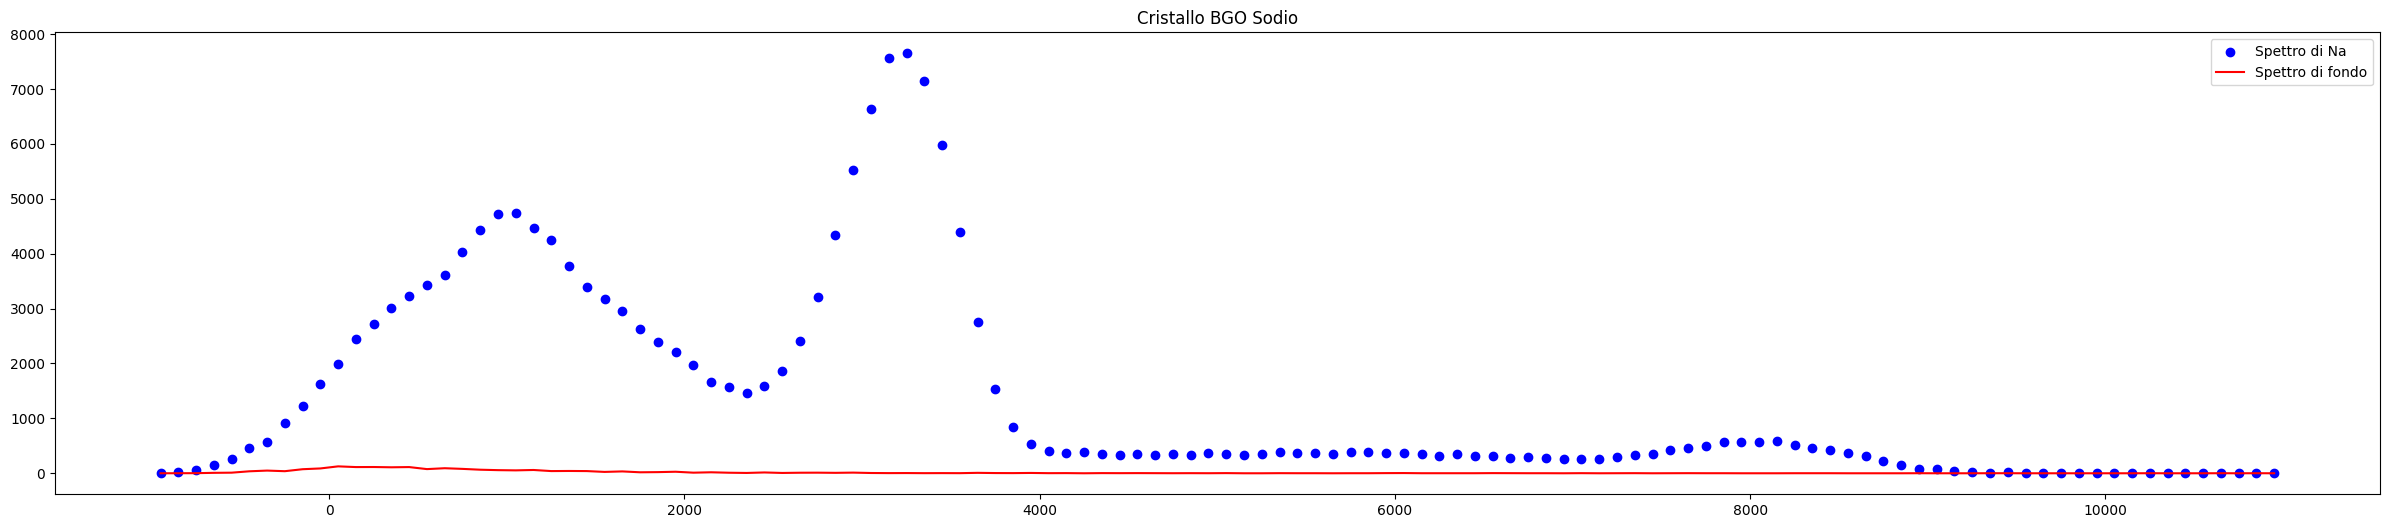

In [3]:
#prendo i dati
df = pd.read_csv('Dati/Parte 2/BGO/Sodio_55.5V.txt', delim_whitespace= True, skiprows = 65, header=None, encoding= 'ISO-8859-1', names= ['ADC', 'Counts'])
df_bkg = pd.read_csv ('Dati/Parte 2/BGO/Bkg_55.5V.txt', delim_whitespace = True, header = None, skiprows = 65, encoding = 'ISO-8859-1', names = ['ADC', 'Counts'])
fig, ax = plt.subplots(figsize = (30,6))
plt.scatter(df['ADC'][:120], df['Counts'][:120], label = 'Spettro di Na', color = 'blue')
plt.plot(df_bkg['ADC'][:120], df_bkg['Counts'][:120], label = 'Spettro di fondo', color = 'red')
plt.legend()
plt.title('Cristallo BGO Sodio')

## Primo picco

In [4]:
start_index = 35
end_index = 51
df_primo_picco_sodio = df.iloc[start_index:end_index]
err_primo_picco_sodio = np.array(np.sqrt(df_primo_picco_sodio['Counts'][:]))
#print(err_primo_picco_sodio)


In [5]:
pars, vals, ers, *other = LS_fit(df_primo_picco_sodio['ADC'], df_primo_picco_sodio['Counts'], err_primo_picco_sodio, gauss, mu = 3170, sigma = 350, a = 7400 )

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 523 (χ²/ndof = 40.2)       │              Nfcn = 76               │
│ EDM = 2.44e-06 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ mu    │ 3.1793e3  │ 0.0015e3  │            │            │         │         │       │
│ 1 │ sigma │   337.2   │    1.3    │            │            │         │         │       │
│ 2 │ a     │  7.55e3   │  0.04e3   │            │            │         │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬────────────────────────────┐
│       │       mu    sigma        a │
├───────┼────────────────────────────┤
│    mu │     2.38     -0.7     11.1 │
│ sigma │     -0.7      1.8    -34.1 │
│     a │     11.1    -34.1 1.57e+03 │
└───────┴────────────────────────────┘

In [6]:
for i in range(len(vals)):
    print(f'{pars[i]} = {vals[i]} +/- {ers[i]}')

mu = 3179.306893746671 +/- 1.5431672400803904
sigma = 337.2397754390937 +/- 1.3401664976636143
a = 7551.432081851714 +/- 39.58330315029844


In [7]:
risol_na_1 = 2.355 * vals[1]/vals[0]

## Secondo picco

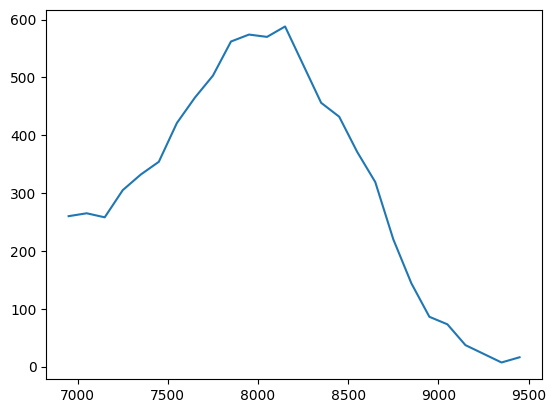

In [8]:
start_index = 79
end_index = 105
df_secondo_picco_sodio = df.iloc[start_index : end_index]
err_secondo_picco_sodio = np.array(np.sqrt(df_secondo_picco_sodio['Counts']))
plt.plot(df_secondo_picco_sodio['ADC'], df_secondo_picco_sodio['Counts'])
#print(df_secondo_picco_sodio)

In [9]:
pars, vals, errs, *others = LS_fit(df_secondo_picco_sodio['ADC'], df_secondo_picco_sodio['Counts'], err_secondo_picco_sodio, gauss, mu = 8000, sigma = 350, a = 500)

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 223.2 (χ²/ndof = 9.7)      │              Nfcn = 101              │
│ EDM = 9.95e-07 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ mu    │  7.908e3  │  0.008e3  │            │            │         │         │       │
│ 1 │ sigma │    561    │     6     │            │            │         │         │       │
│ 2 │ a     │    587    │     8     │            │            │         │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬───────────────────┐
│       │    mu sigma     a │
├───────┼───────────────────┤
│    mu │  71.5   -30    20 │
│ sigma │   -30  36.5   -30 │
│     a │    20   -30  67.3 │
└───────┴───────────────────┘

In [10]:
risol_na_2 = 2.355 * vals[1]/vals[0]

# COBALTO

C:\Users\matte\AppData\Local\Temp\ipykernel_14024\2913299300.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv('Dati/Parte 2/BGO/Cobalto_55.5V_bins100.txt', delim_whitespace= 'True', skiprows = 65, header=None, encoding= 'ISO-8859-1', names= ['ADC', 'Counts'])
C:\Users\matte\AppData\Local\Temp\ipykernel_14024\2913299300.py:3: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df_bkg = pd.read_csv ('Dati/Parte 2/BGO/Bkg_55.5V.txt', delim_whitespace = 'True', header = None, skiprows = 65, encoding = 'ISO-8859-1', names = ['ADC', 'Counts'])


NameError: name 'filtrato' is not defined

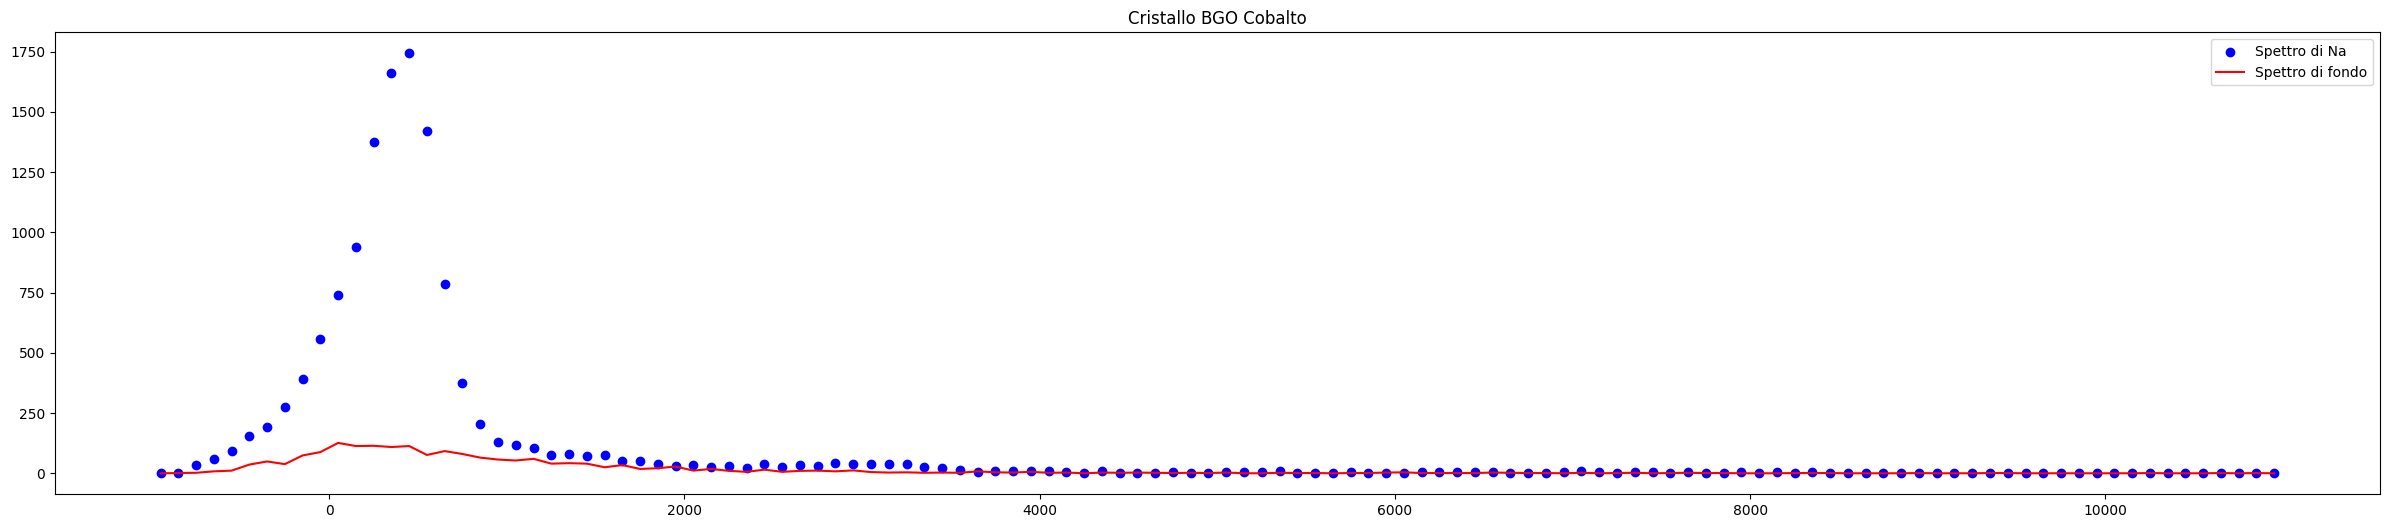

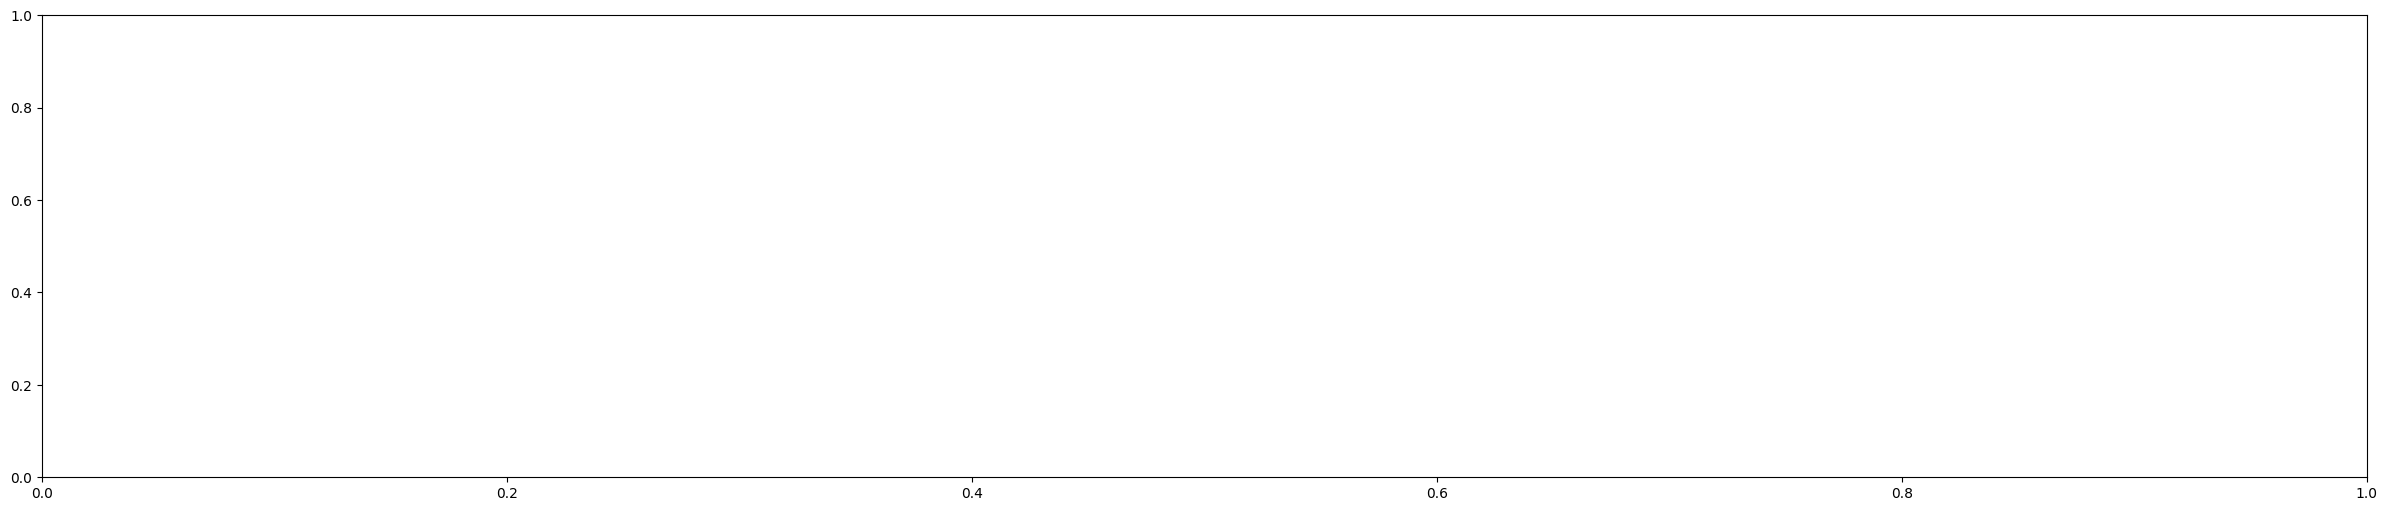

In [11]:
# prendo i dati
df = pd.read_csv('Dati/Parte 2/BGO/Cobalto_55.5V_bins100.txt', delim_whitespace= 'True', skiprows = 65, header=None, encoding= 'ISO-8859-1', names= ['ADC', 'Counts'])
df_bkg = pd.read_csv ('Dati/Parte 2/BGO/Bkg_55.5V.txt', delim_whitespace = 'True', header = None, skiprows = 65, encoding = 'ISO-8859-1', names = ['ADC', 'Counts'])
fig, ax = plt.subplots(figsize = (30,6))
plt.scatter(df['ADC'][:120], df['Counts'][:120], label = 'Spettro di Na', color = 'blue')
plt.plot(df_bkg['ADC'][:120], df_bkg['Counts'][:120], label = 'Spettro di fondo', color = 'red')
plt.legend()
plt.title('Cristallo BGO Cobalto')
fig, ax = plt.subplots(figsize = (30,6))
plt.scatter(df['ADC'][0:100], filtrato)
plt.title('no fondo')

In [ ]:
filtrato = df['Counts'][0:100] - df_bkg['Counts'][0:100]
#print(df_filtrato['Counts'][:])
start_index = 6
end_index = 20
# filtrato = df.iloc[start_index:end_index]
#df_bkg = df_bkg[start_index:end_index]
err_filtrato = np.array(np.sqrt(filtrato[start_index:end_index]) + np.sqrt(df_bkg['Counts'][start_index:end_index]))


In [ ]:
pars, vals, ers, *other = LS_fit(df['ADC'][start_index:end_index], filtrato[start_index:end_index], err_filtrato, gauss_pol3, mu = 500, sigma = 250, a  = 1000, b = 0, c = 0, cost = 0, d=0)

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 15.01 (χ²/ndof = 2.1)      │              Nfcn = 436              │
│ EDM = 2.26e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ mu    │    418    │     6     │            │            │         │         │       │
│ 1 │ sigma │    180    │    10     │            │            │         │         │       │
│ 2 │ a     │  1.44e3   │  0.08e3   │            │            │         │         │       │
│ 3 │ b     │   0.07    │   0.15    │            │            │         │         │       │
│ 4 │ c     │ -1.54e-3  │  0.18e-3  │            │            │         │         │       │
│ 5 │ cost  │    390    │    40     │            │            │         │         │       │
│ 6 │ d     │  1.16e-6  │  0.31e-6  │            │            │         │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬──────────────────────────────────────────────────────────────────────────────────────────────────────────┐
│       │             mu          sigma              a              b              c           cost              d │
├───────┼──────────────────────────────────────────────────────────────────────────────────────────────────────────┤
│    mu │           34.4             15            182         -0.360    -723.452e-6             -7  1.15025123e-6 │
│ sigma │             15           99.3            590         -1.386    -361.809e-6           -320  2.21339816e-6 │
│     a │            182            590       6.59e+03        -11.454   -4.734311e-3         -2.4e3 20.21024113e-6 │
│     b │         -0.360         -1.386        -11.454         0.0241       8.521e-6          4.928   -40.77129e-9 │
│     c │    -723.452e-6    -361.809e-6   -4.734311e-3       8.521e-6       3.37e-08   -1.240630e-3     -43.72e-12 │
│  cost │             -7           -320         -2.4e3          4.928   -1.240630e-3       1.44e+03 -5.63262972e-6 │
│     d │  1.15025123e-6  2.21339816e-6 20.21024113e-6   -40.77129e-9     -43.72e-12 -5.63262972e-6       9.74e-14 │
└───────┴──────────────────────────────────────────────────────────────────────────────────────────────────────────┘

In [ ]:
for i in range(len(vals)):
    print(f'{pars[i]} = {vals[i]} +/- {ers[i]}')

mu = 418.4512276213096 +/- 5.8628914454893835
sigma = 179.74304902844622 +/- 9.965890447583812
a = 1436.4892222762219 +/- 81.16159950185101
b = 0.06832366244454334 +/- 0.15518874160613635
c = -0.0015399958129109139 +/- 0.00018367868861104958
cost = 389.1332175296964 +/- 37.970033751658875
d = 1.156785916157692e-06 +/- 3.1215017105554454e-07


In [ ]:
risol_cob = 2.355 * vals[1] / vals[0]
print ('risoluzione cobalto 122 keV = ', risol_cob, '\n', 
       'risoluzione sodio 511 keV = ', risol_na_1, '\n',
       'risoluzione sodio 1275 keV = ', risol_na_2)

risoluzione cobalto 122 keV =  1.0115751908967145 
 risoluzione sodio 511 keV =  0.24980277076150295 
 risoluzione sodio 1275 keV =  0.16713200286289231
